Menu:
1. Solve N-Queens
2. Solve Graph Coloring
3. Exit
Enter your choice: 1
Enter the size of the chessboard (N): 4
Initial Board:
- - - - 
- - - - 
- - - - 
- - - - 

Step 1:
Q - - - 
- - - - 
- - - - 
- - - - 

Step 2:
Q - - - 
- - Q - 
- - - - 
- - - - 

Step 3:
Q - - - 
- - Q - 
- - - - 
- Q - - 

Step 4:
Q - - - 
- - - Q 
- - - - 
- - - - 

Step 5:
Q - - - 
- - - Q 
- Q - - 
- - - - 

Step 6:
Q - - - 
- - - Q 
- - - - 
- - Q - 

Step 7:
Q - - - 
- - - - 
- Q - - 
- - - - 

Step 8:
Q - - - 
- - - Q 
- Q - - 
- - - - 

Step 9:
Q - - - 
- - - - 
- - - Q 
- - - - 

Step 10:
Q - - - 
- - - - 
- - - Q 
- Q - - 

Step 11:
Q - - - 
- - - - 
- - - - 
- Q - - 

Step 12:
Q - - - 
- - Q - 
- - - - 
- Q - - 

Step 13:
Q - - - 
- - - - 
- - - Q 
- Q - - 

Step 14:
Q - - - 
- - - - 
- - - - 
- - Q - 

Step 15:
Q - - - 
- - - Q 
- - - - 
- - Q - 

Step 16:
- Q - - 
- - - - 
- - - - 
- - - - 

Step 17:
- Q - - 
- - - Q 
- - - - 
- - - - 

Step 18:
- Q - - 
- - - Q 
Q - - - 
- - - - 

Step 19:
- Q

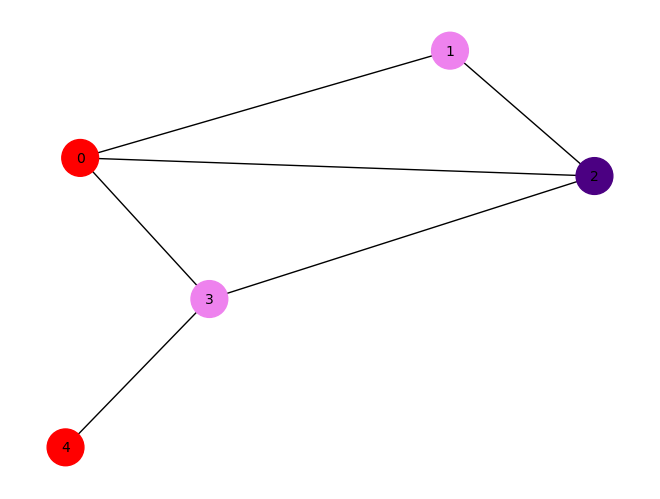

Menu:
1. Solve N-Queens
2. Solve Graph Coloring
3. Exit


In [ ]:
def solve_n_queens(N):
    queen = "Q"
    empty = "-"
    step_counter = 1

    b = [[empty] * N for _ in range(N)]

    def is_safe(i, j):
        for p in range(N):
            if b[i][p] == queen or b[p][j] == queen:
                return False

        for n in range(N):
            for m in range(N):
                if i + j == n + m or i - j == n - m:
                    if b[n][m] == queen:
                        return False
        return True

    def n_queen(noq):
        nonlocal step_counter
        if noq == 0:
            return True

        for i in range(N):
            for j in range(N):
                if b[i][j] != queen and is_safe(i, j):
                    b[i][j] = queen
                    print(f"Step {step_counter}:")
                    print_board(b)
                    step_counter += 1
                    if n_queen(noq - 1):
                        return True
                    b[i][j] = empty

        return False

    print("Initial Board:")
    print_board(b)
    if n_queen(N):
        print("Solution Found:")
        print_board(b)
    else:
        print("No Solution Found")

def solve_graph_coloring(g, m):
    po_col = ["red", "violet", "indigo", "blue", "yellow", "green", "orange"]

    def can_colour(node, col, col_list):
        for child in g[node]:
            if col_list[child] == po_col[col]:
                return False
        return True

    def graph_colouring(node, v, col_list):
        if node == v:
            return True

        for col in range(m):
            if can_colour(node, col, col_list):
                col_list[node] = po_col[col]
                if graph_colouring(node + 1, v, col_list):
                    return True
                col_list[node] = None

        return False

    def display_colored_graph(g, col_list):
        import matplotlib.pyplot as plt
        import networkx as nx

        G = nx.Graph(g)
        pos = nx.spring_layout(G)
        colors = [col_list[node] for node in G.nodes]

        nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=10)
        plt.show()

    col_list = {node: None for node in g.keys()}

    if graph_colouring(0, len(g.keys()), col_list):
        print(col_list)
        display_colored_graph(g, col_list)
    else:
        print(f"Can't color using {m} colors")


def print_board(b):
    for row in b:
        for cell in row:
            print(cell, end=" ")
        print()
    print()

def main():
    while True:
        print("Menu:")
        print("1. Solve N-Queens")
        print("2. Solve Graph Coloring")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == "1":
            N = int(input("Enter the size of the chessboard (N): "))
            solve_n_queens(N)
        elif choice == "2":
            m = int(input("Enter number of max colors: "))
            g = {}
            n = int(input("Enter number of Edges: "))
            for i in range(n):
                a, b = map(int, input().split())
                if g.get(a) is None:
                    g[a] = []
                g[a].append(b)
                if g.get(b) is None:
                    g[b] = []
                g[b].append(a)
            solve_graph_coloring(g, m)
        elif choice == "3":
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please choose again.")

if __name__ == "__main__":
    main()
